<a href="https://colab.research.google.com/github/irfixq/Avocado_King/blob/main/Avocado_King.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avocado King - Price & Sales Prediction using python

In [1]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))
import numpy as np # linear algebra
print("NumPy version: {}". format(np.__version__))
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print("pandas version: {}". format(pd.__version__))
import matplotlib # collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))
import matplotlib.pyplot as plt
%matplotlib inline
import warnings # ignore warnings
warnings.filterwarnings('ignore')

Python version: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
NumPy version: 1.19.5
pandas version: 1.1.5
matplotlib version: 3.2.2


There are 2 options to get the data, either from GitHub or Google Drive.
In this case, I prefer to use Git Clone since it will be easier for user to access the repo.

In [2]:
## Clone repo from GitHub

! git clone 'https://github.com/irfixq/Avocado_King'

Cloning into 'Avocado_King'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 14 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [ ]:
## Mount Google Drive to get data
## make sure you uploaded the folder into your Google Drive first

#from google.colab import drive 
#drive.mount('/content/drive')

In [3]:
## get working directory
! pwd

## list all folders in working directory
! ls

/content
Avocado_King  sample_data


In [4]:
## change working directory to github folder
import os
os.chdir('/content/Avocado_King')


In [5]:
## check working directory after change path
! pwd
! ls

/content/Avocado_King
Avocado_King.ipynb	   google-data.csv	     README.md
feature-explanations.xlsx  price-and-sales-data.csv


## Data Pre-Processing

1.   Data pre-processing for price and sales data
2.   Data pre-processing for Google search data



##### Price and Sales Data

In [15]:
## see the shape of the dataset (rows, columns)
df_price = pd.read_csv('/content/Avocado_King/price-and-sales-data.csv')
df_price.shape

(25161, 13)

In [16]:
## list all column names
df_price.columns

Index(['Date', 'AveragePrice', 'TotalVolume', '4046', '4225', '4770',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'year',
       'region'],
      dtype='object')

In [17]:
## checking data type of each column
df_price.dtypes

Date             object
AveragePrice    float64
TotalVolume     float64
4046            float64
4225            float64
4770            float64
TotalBags       float64
SmallBags       float64
LargeBags       float64
XLargeBags      float64
type             object
year              int64
region           object
dtype: object

In [18]:
## see the dataset
df_price

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1/4/2015,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,1/4/2015,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
2,1/4/2015,NaN,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,BaltimoreWashington
3,1/4/2015,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,conventional,2015,Boise
4,1/4/2015,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.00,conventional,2015,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25156,7/14/2019,1.66,4007.93,218.47,252.29,0.00,3537.17,1460.65,2076.52,0.00,organic,2019,Syracuse
25157,7/14/2019,1.06,3767.89,129.01,0.00,0.00,3638.88,3635.55,3.33,0.00,organic,2019,Tampa
25158,7/14/2019,1.99,1236969.18,106370.49,209820.63,5606.10,915082.38,667494.94,247562.25,25.19,organic,2019,TotalUS
25159,7/14/2019,2.33,209408.22,23918.57,42432.02,985.67,142071.96,75883.13,66163.64,25.19,organic,2019,West


In [19]:
## check for missing values in dataset
df_price.isna() 

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25156,False,False,False,False,False,False,False,False,False,False,False,False,False
25157,False,False,False,False,False,False,False,False,False,False,False,False,False
25158,False,False,False,False,False,False,False,False,False,False,False,False,False
25159,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
## there are 2 option to handle missing data
# option 1 = eliminate data point that contain missing values (not recommended as you might missed important data for other attribute)
# option 2 = substitue missing value with avg value of the attribute

dfnew_price = df_price.fillna(df_price.mean())

In [21]:
## check for missing values in dataset
dfnew_price.isna() 

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25156,False,False,False,False,False,False,False,False,False,False,False,False,False
25157,False,False,False,False,False,False,False,False,False,False,False,False,False
25158,False,False,False,False,False,False,False,False,False,False,False,False,False
25159,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
## see new dataset after substitue missing values
dfnew_price

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1/4/2015,1.220000,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,1/4/2015,1.000000,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
2,1/4/2015,1.396018,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,BaltimoreWashington
3,1/4/2015,1.010000,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,conventional,2015,Boise
4,1/4/2015,1.020000,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.00,conventional,2015,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25156,7/14/2019,1.660000,4007.93,218.47,252.29,0.00,3537.17,1460.65,2076.52,0.00,organic,2019,Syracuse
25157,7/14/2019,1.060000,3767.89,129.01,0.00,0.00,3638.88,3635.55,3.33,0.00,organic,2019,Tampa
25158,7/14/2019,1.990000,1236969.18,106370.49,209820.63,5606.10,915082.38,667494.94,247562.25,25.19,organic,2019,TotalUS
25159,7/14/2019,2.330000,209408.22,23918.57,42432.02,985.67,142071.96,75883.13,66163.64,25.19,organic,2019,West


##### Google Search Data

In [ ]:
## see the shape of the google search data (rows, columns)
df_google = pd.read_csv('/content/Avocado_King/google-data.csv')
df_google.shape

##### Data Distribution

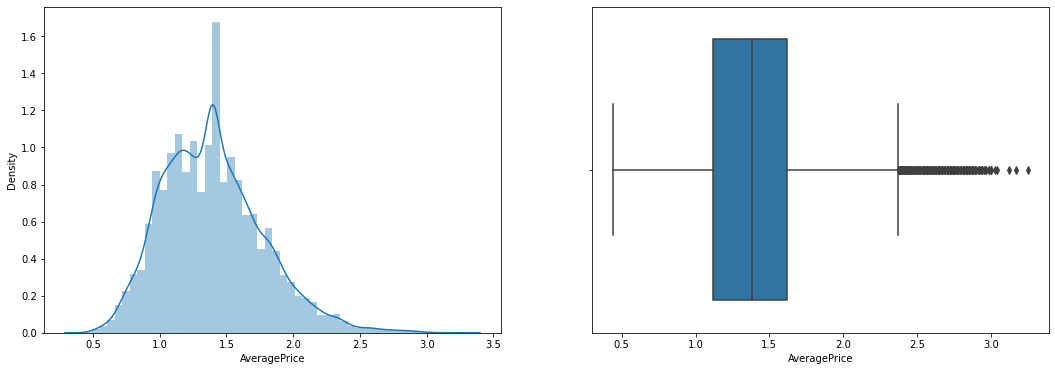

In [41]:
## see distribution of avg price
import seaborn as sns
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# distribution plot
sns.distplot(dfnew_price.AveragePrice, ax=ax[0])

# box plot
sns.boxplot(dfnew_price.AveragePrice, ax=ax[1])



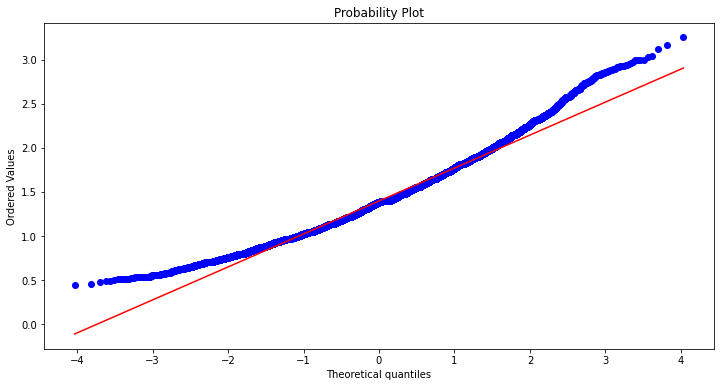

In [47]:
## see probability distribution of avg price
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
from scipy import stats
stats.probplot(dfnew_price['AveragePrice'], plot=ax)
plt.show()